In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
xp = cp if poppy.accel_math._USE_CUPY else np

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = False

import warnings
warnings.filterwarnings("ignore")

from prop_models import compact2, agpm
reload(compact2)

from wfsc_1dm import utils

from imshows import *

wavelength_c = 750e-9*u.m

pupil 26.0
6
[2, 8, 32, 128, 512, 2048]
[array([512., 512.])]
[array([512., 512.]), array([8., 8.]), array([2., 2.]), array([0.5, 0.5]), array([0.125, 0.125]), array([0.03125, 0.03125])]
0
1


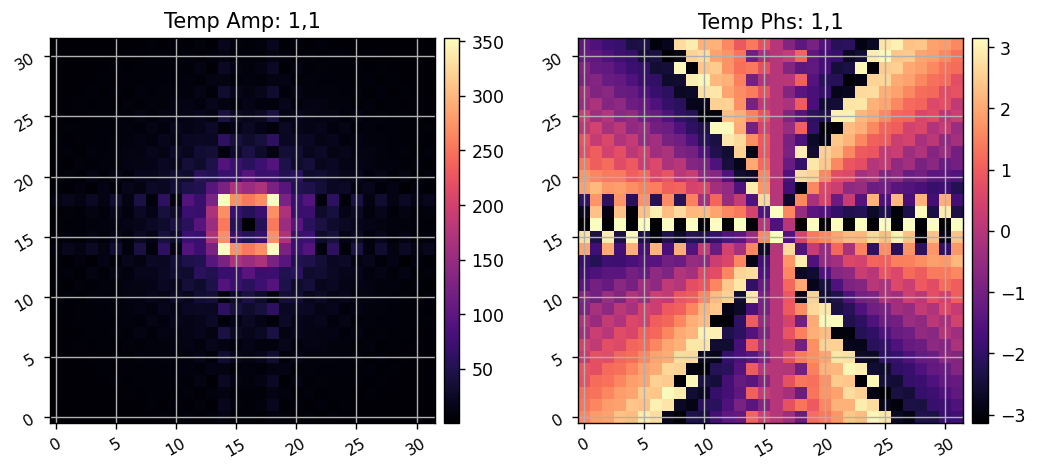

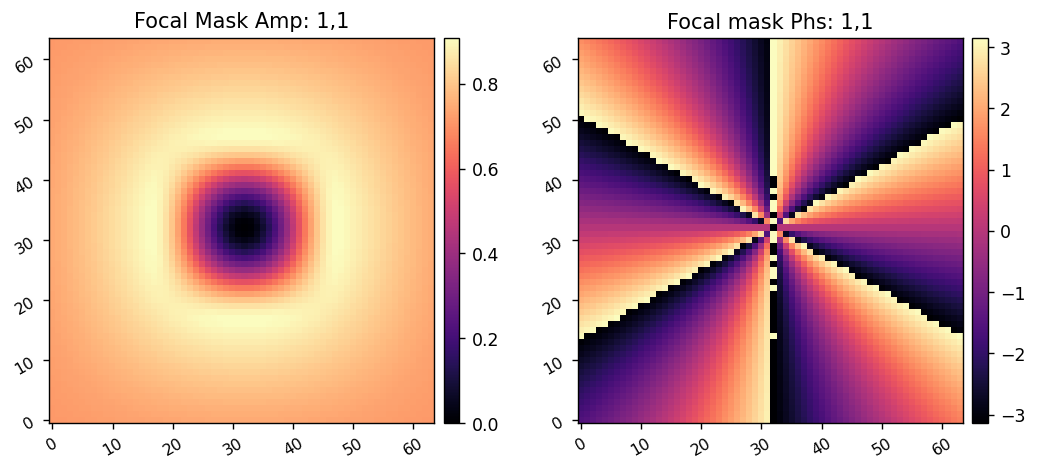

2


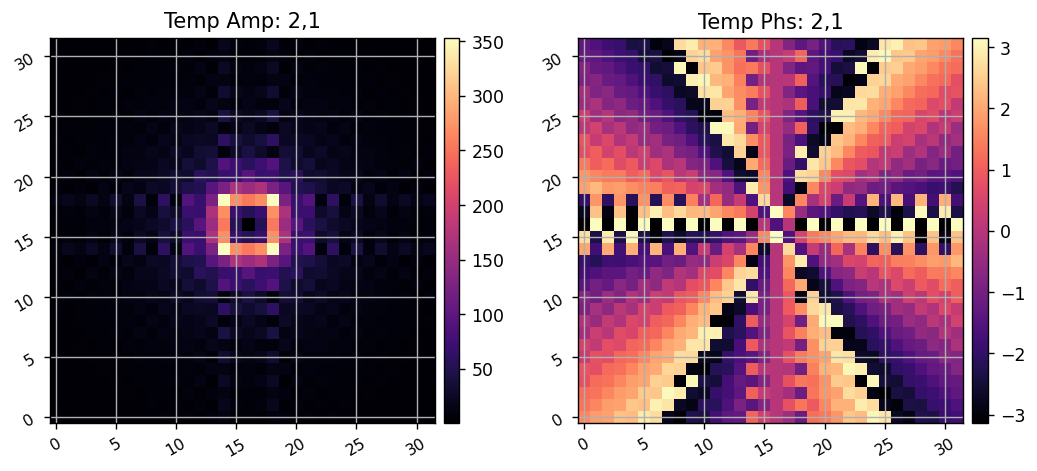

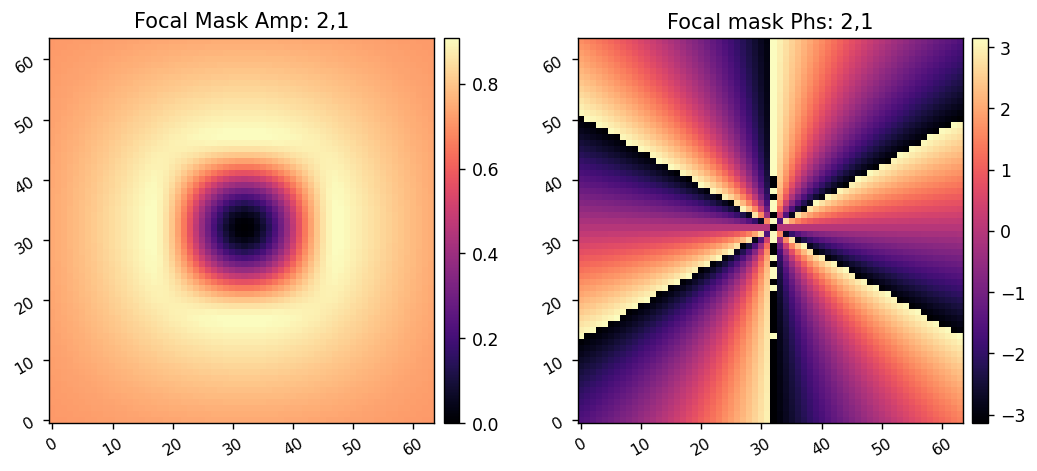

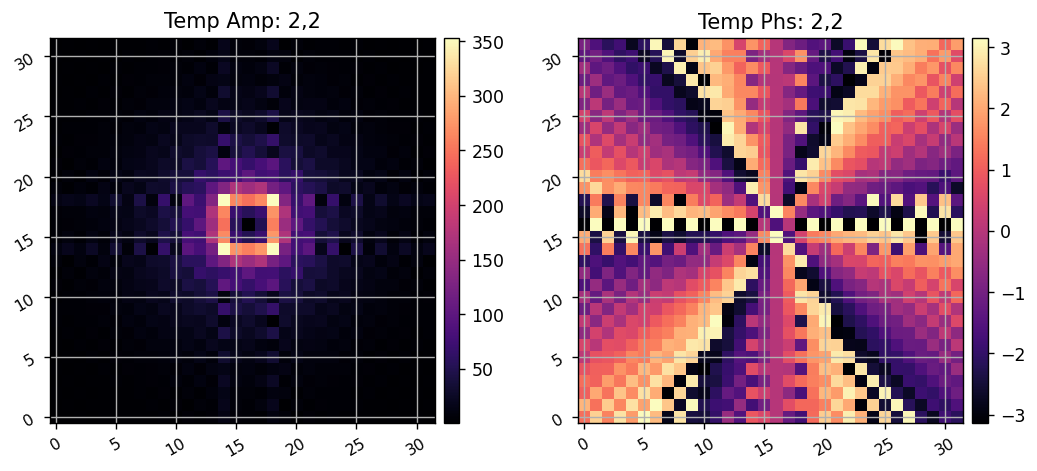

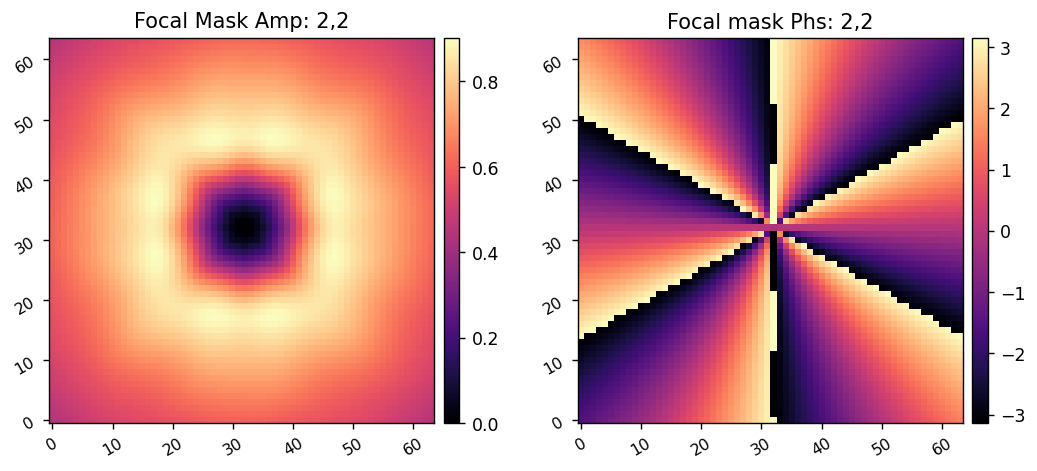

3


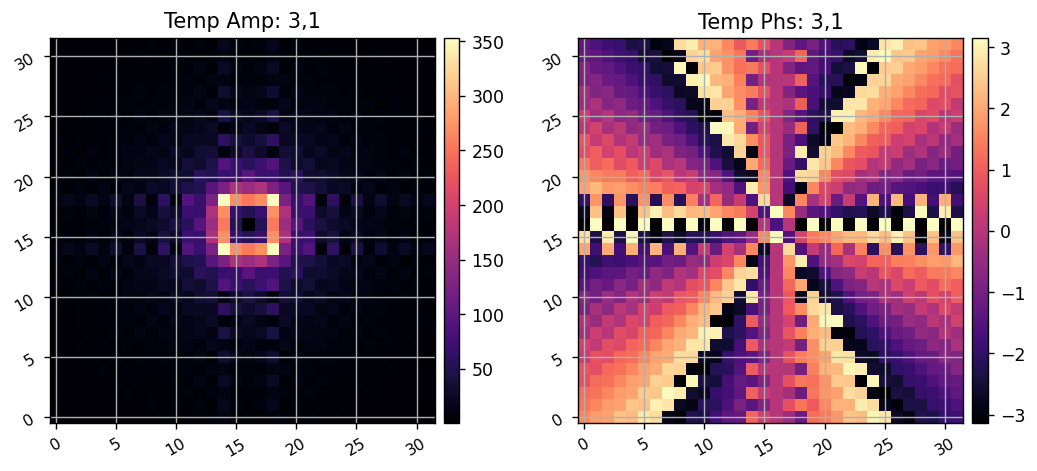

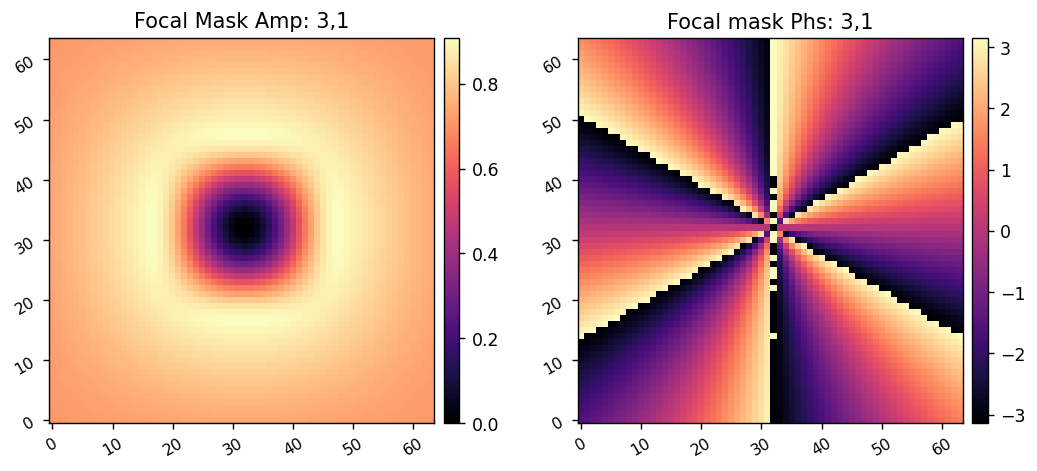

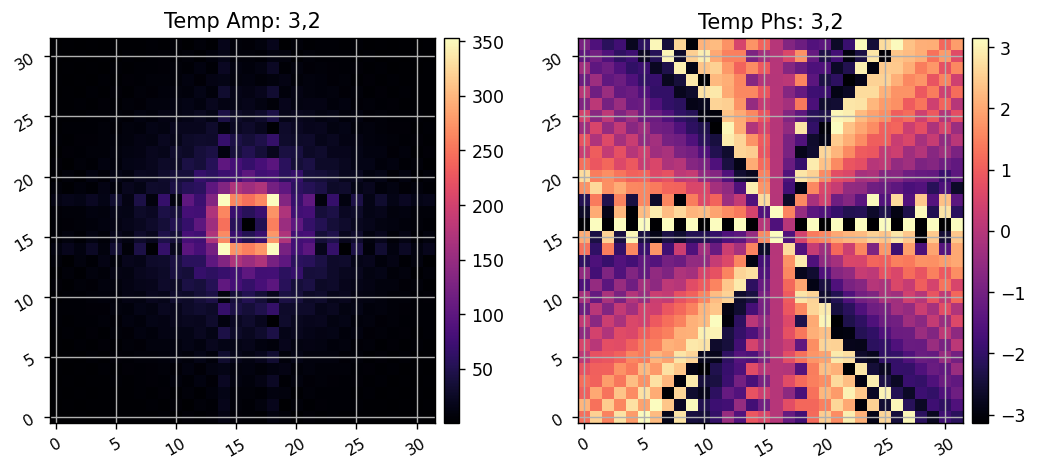

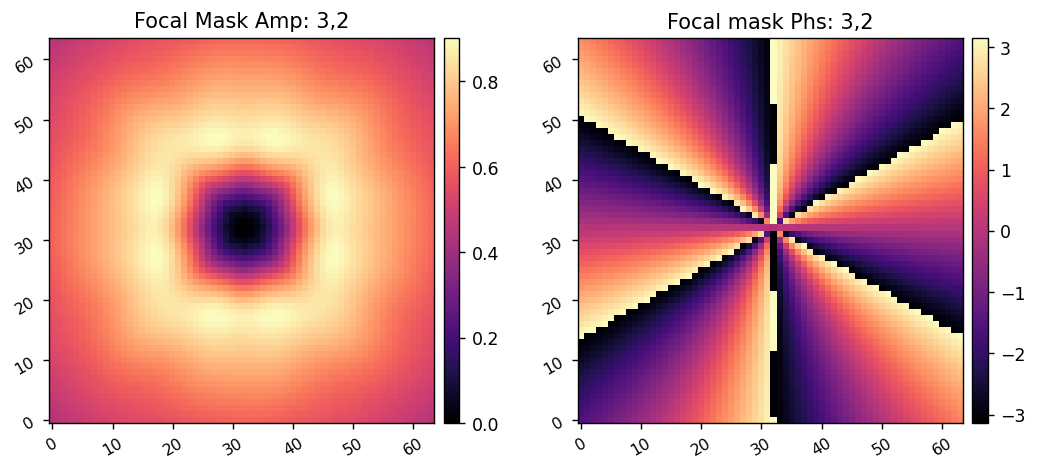

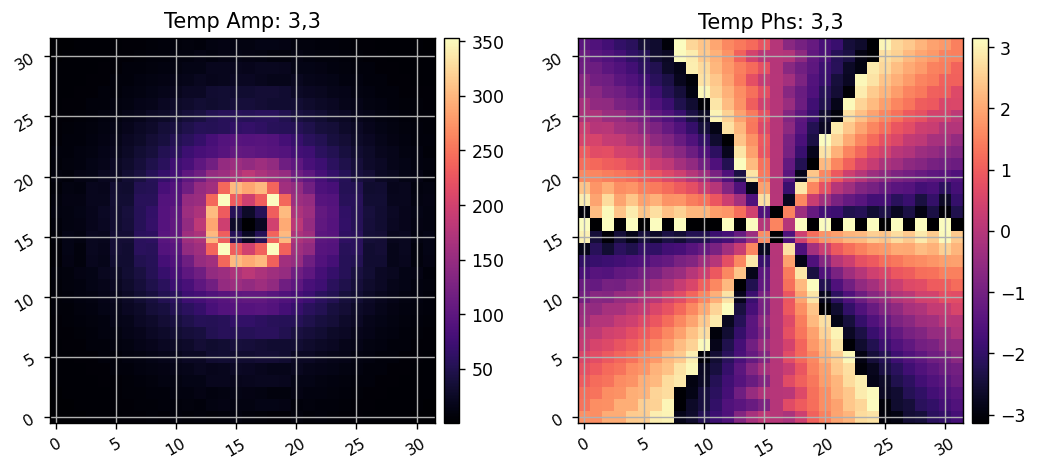

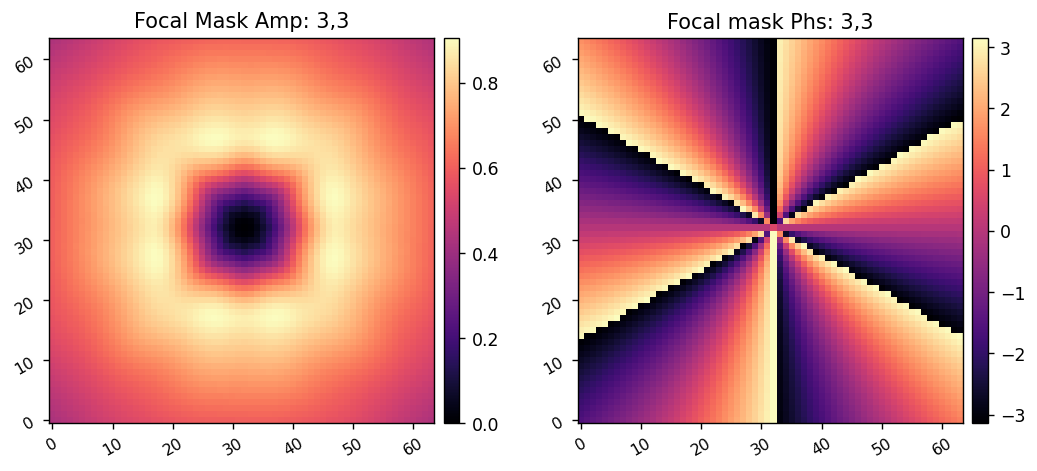

4


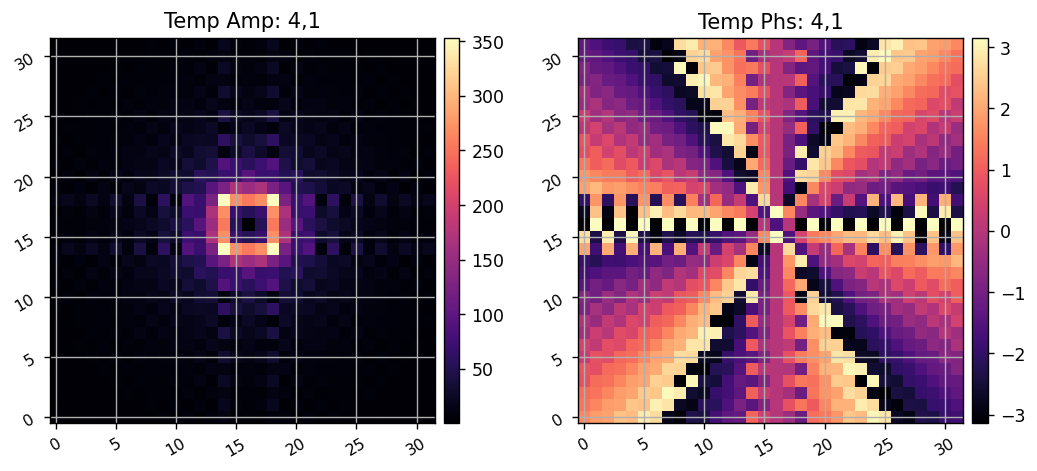

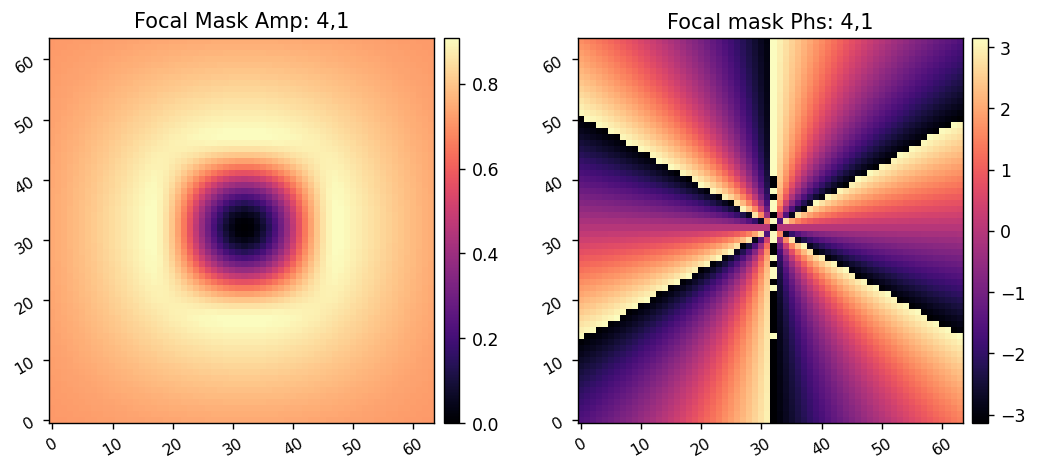

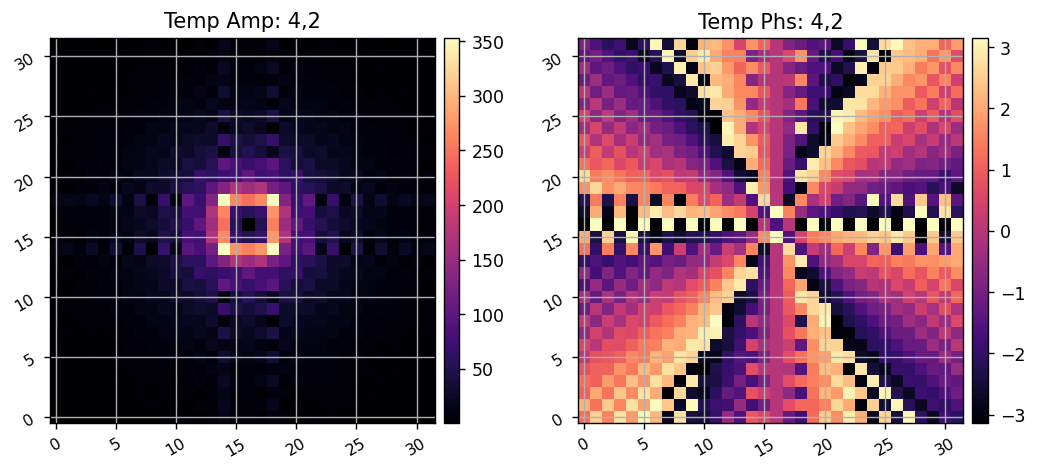

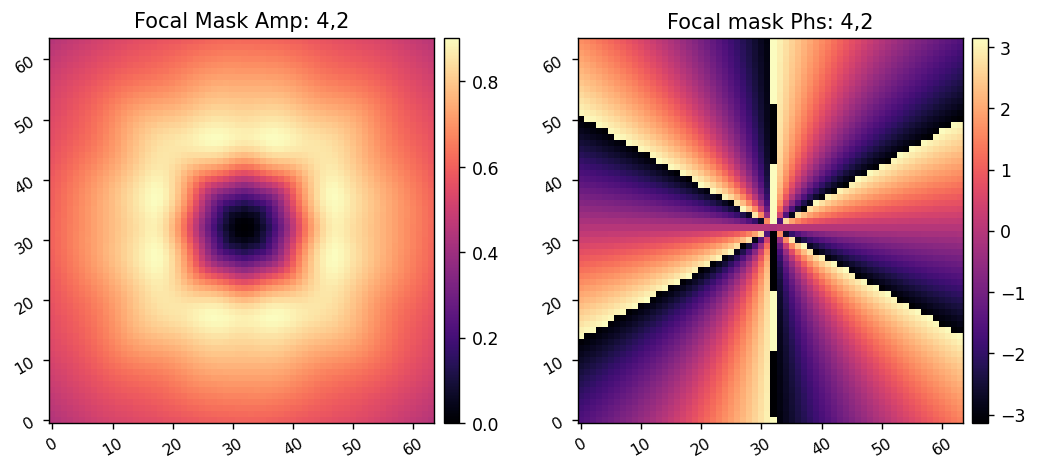

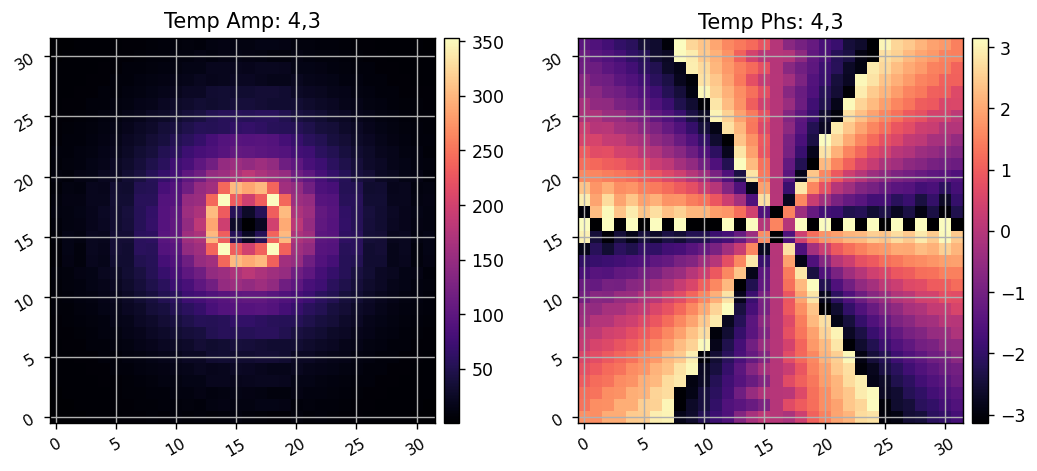

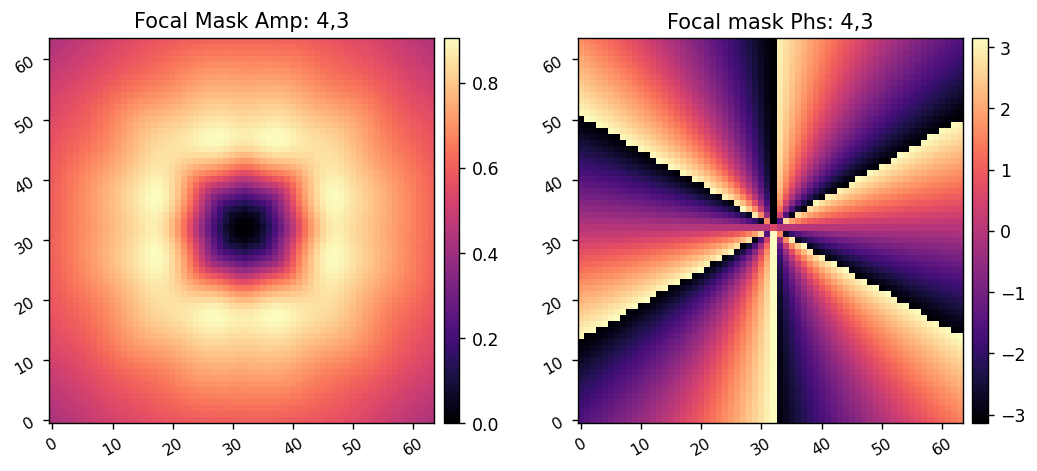

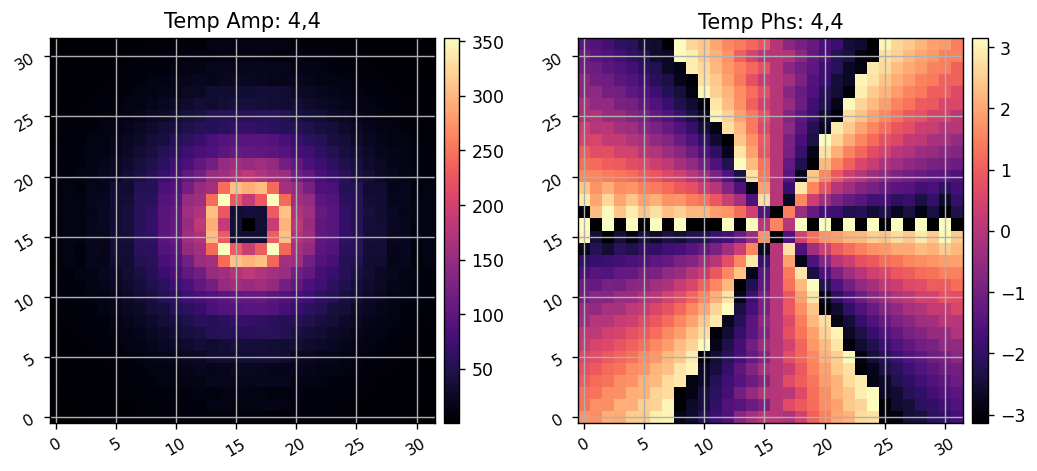

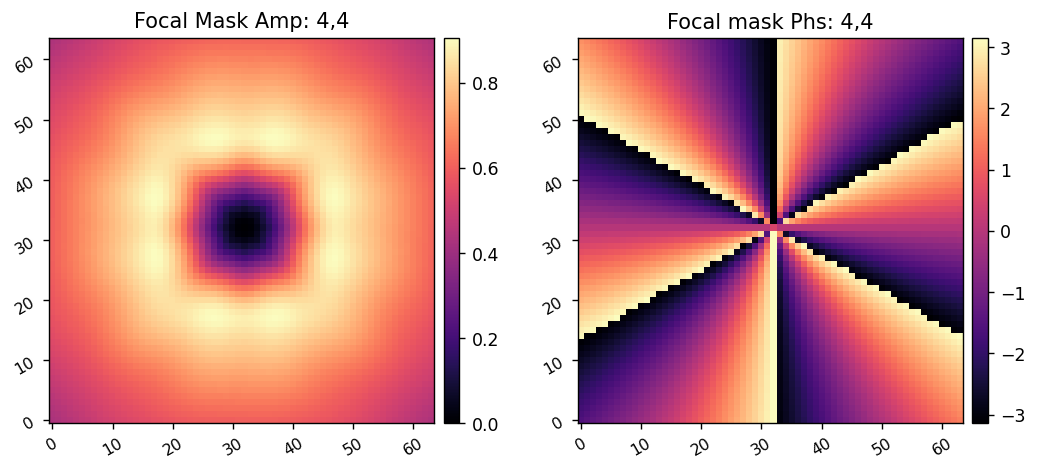

5


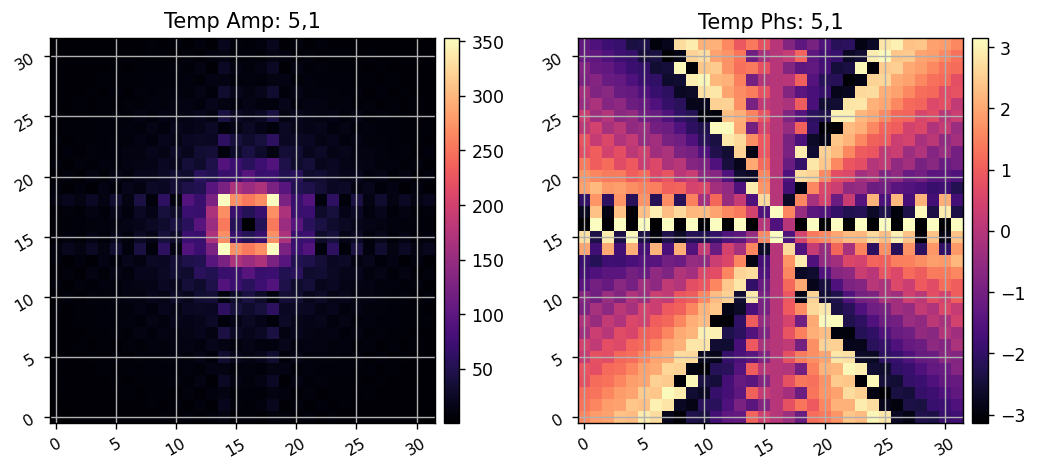

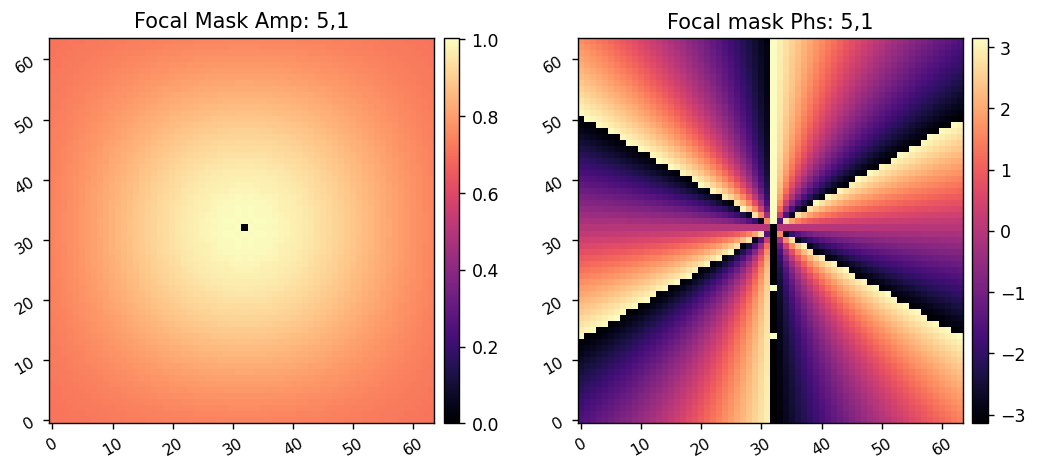

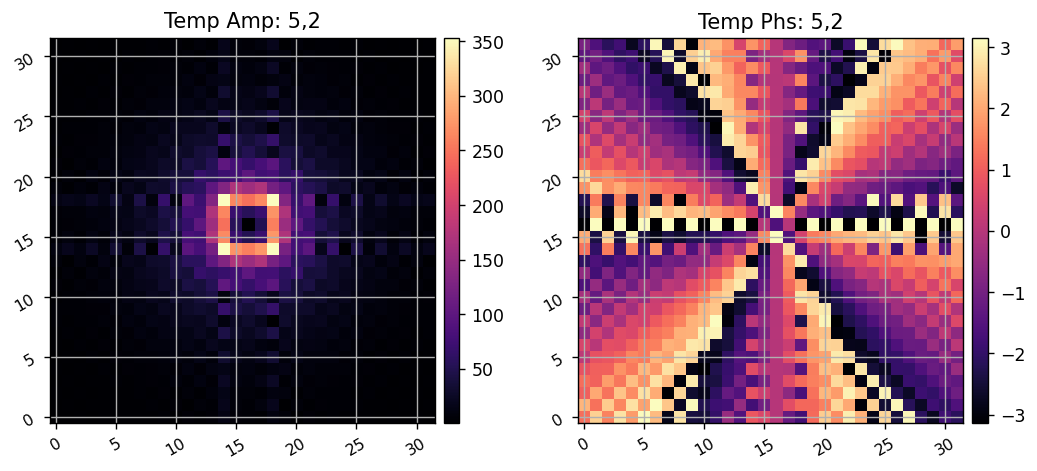

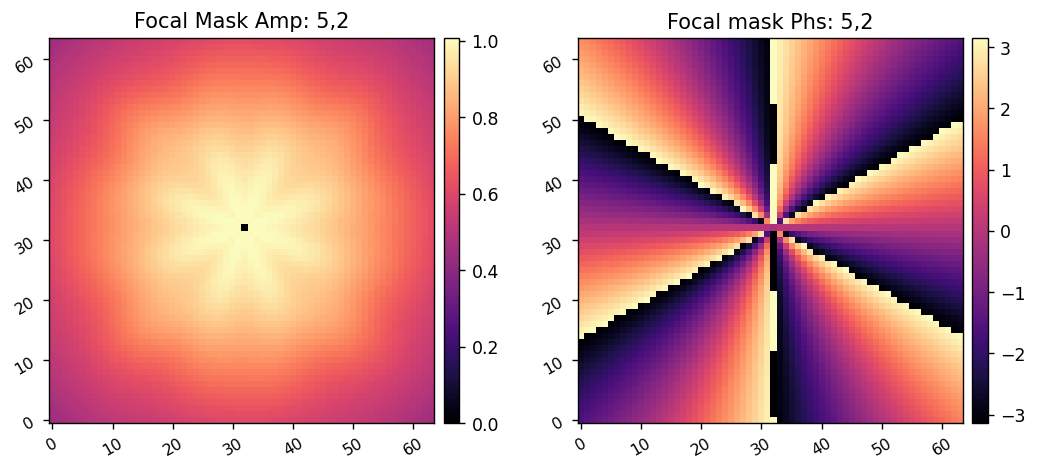

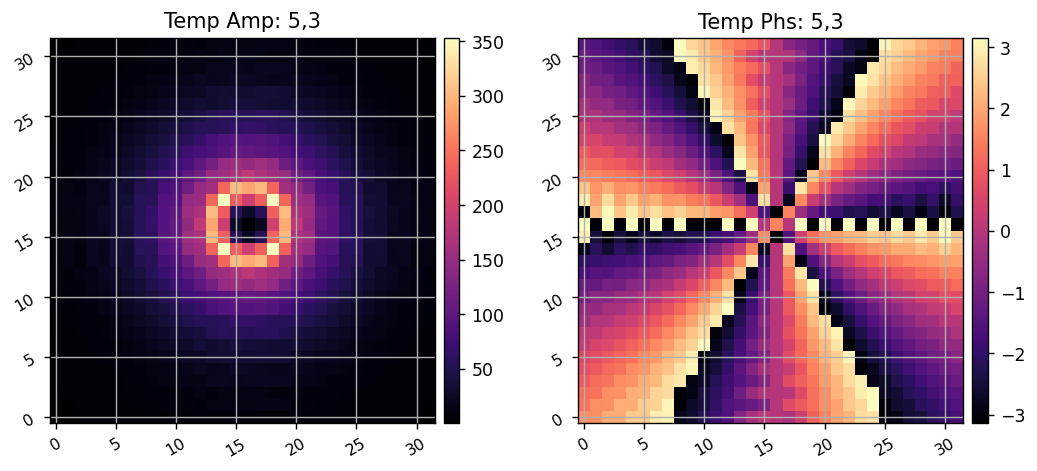

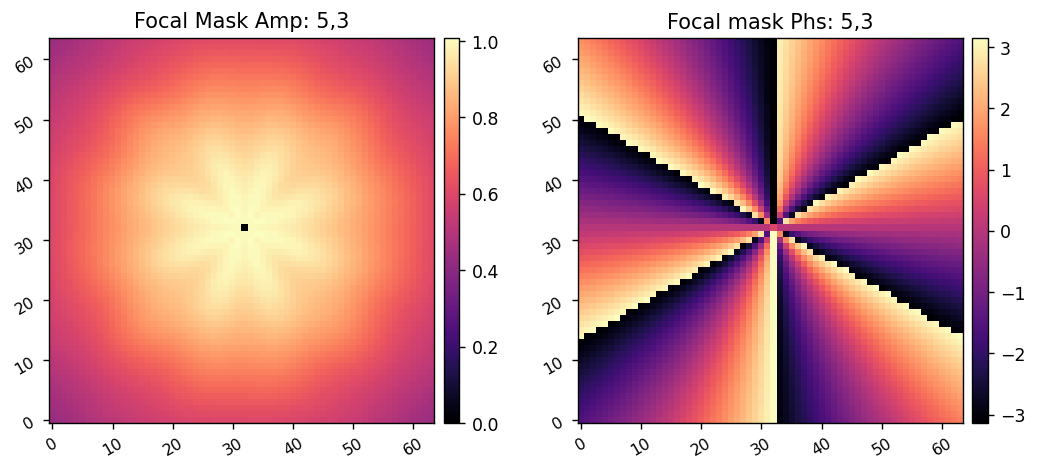

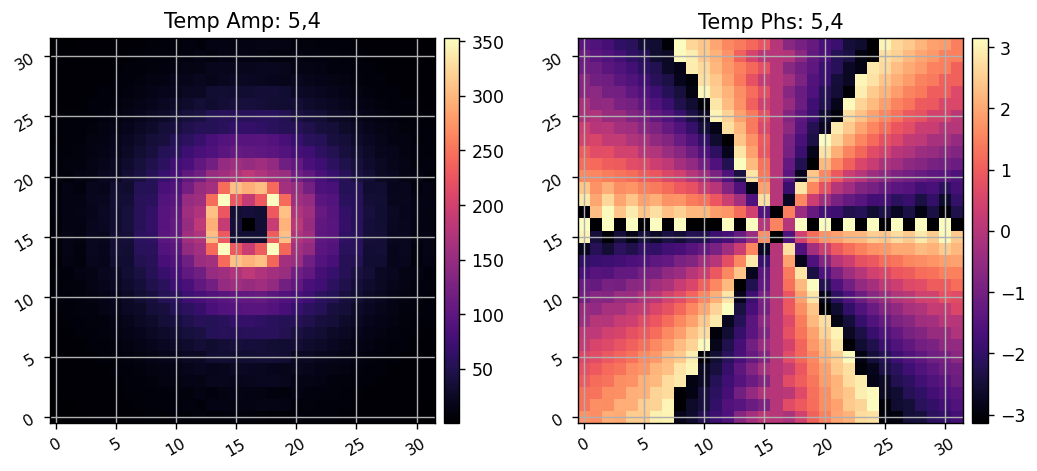

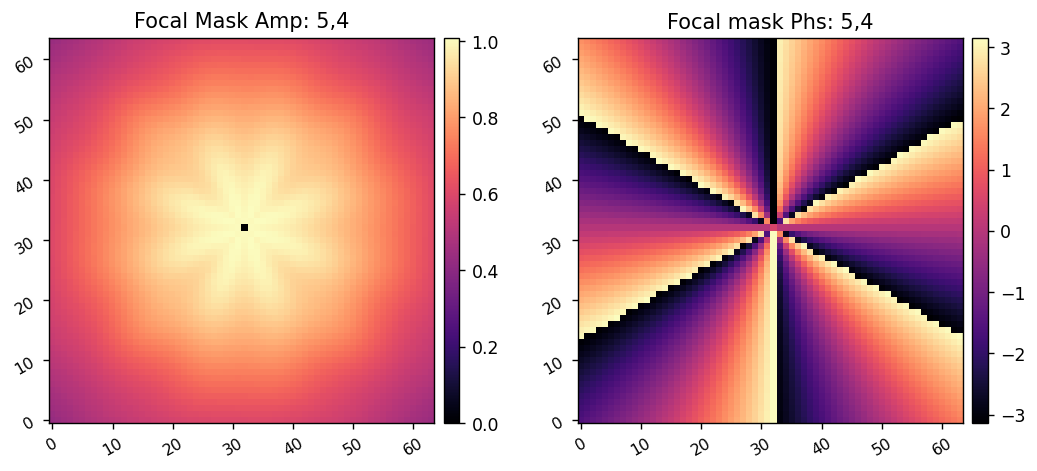

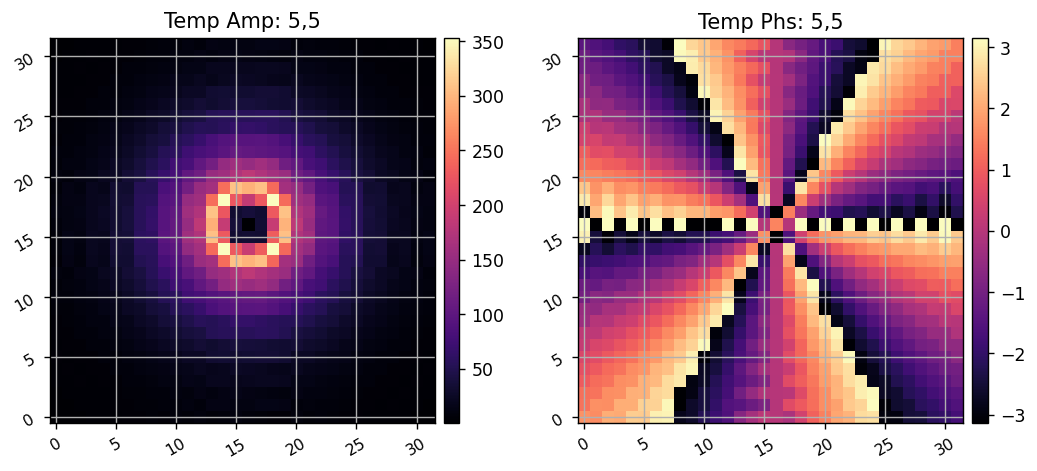

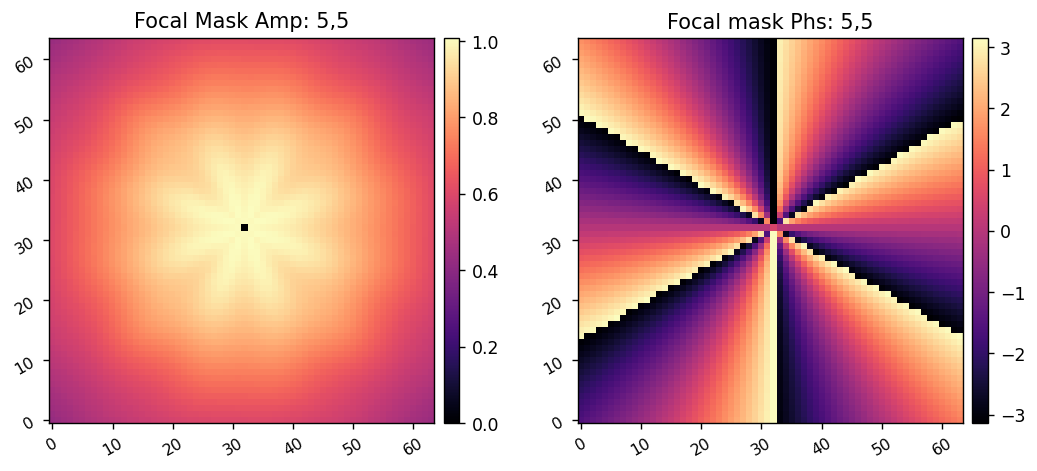

TypeError: CORO.fft() missing 1 required positional argument: 'wavefront'

In [2]:
poppy_log.disabled = True

reload(compact2)
c = compact2.CORO()

c.npix = 256
c.oversample = 4
c.psf_pixelscale_lamD = 0.25
c.npsf = 128
c.CHARGE = 6
# c.norm = 100
# c.set_dm(np.random.randn(c.Nact,c.Nact)*2e-8)

c.USE_FPM = False
c.USE_FPM = True

c.propagate()
imshow2(xp.abs(c.wavefront)**2, xp.angle(c.wavefront), pxscl=c.psf_pixelscale_lamD, lognorm1=True)
